In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

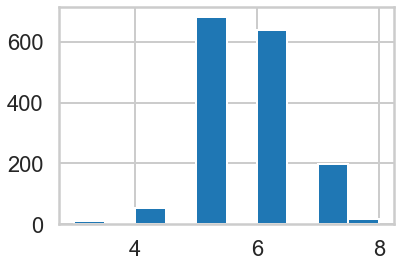

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13660062565172054
% Good wines in Testing: 0.134375


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 5, 'min_samples_leaf': 6} 0.38142021462162595 {'mean_fit_time': array([0.00119696, 0.00059862, 0.00079789, 0.00079789, 0.00059814,
       0.00059857, 0.00099759, 0.00099702, 0.00019922, 0.00099745,
       0.00019903, 0.00079651, 0.00099688, 0.0009975 , 0.0017951 ,
       0.00079823, 0.00099926, 0.00059876, 0.00099778, 0.00099616,
       0.00079794, 0.00059872, 0.0009975 , 0.00099854, 0.00039902,
       0.00079794, 0.00079813, 0.00099692, 0.00099769, 0.00099702,
       0.00099759, 0.00099797, 0.0009975 , 0.00079746, 0.00099769,
       0.00099759, 0.00099707, 0.00039911, 0.00079818, 0.00099721,
       0.00099773, 0.00119677]), 'std_fit_time': array([4.00138253e-04, 4.88775425e-04, 3.98947614e-04, 3.98946275e-04,
       4.88383368e-04, 4.88733398e-04, 6.31279389e-04, 2.01403733e-06,
       3.98445129e-04, 9.60800251e-07, 3.98063660e-04, 3.98276175e-04,
       2.33601546e-07, 8.71451706e-07, 1.59559252e-03, 3.99112986e-04,
       4.28464124e-06, 4.88889109e-04

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


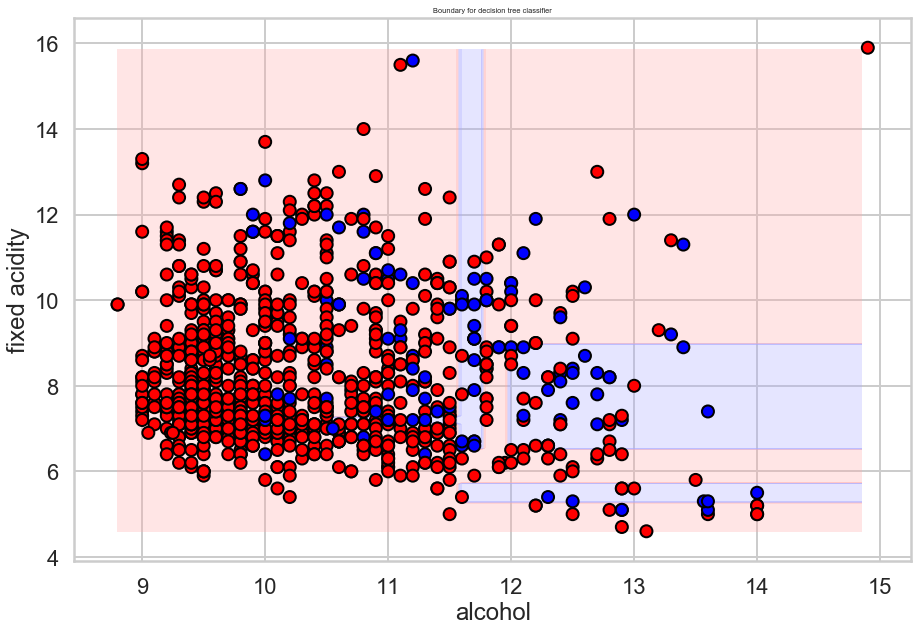

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

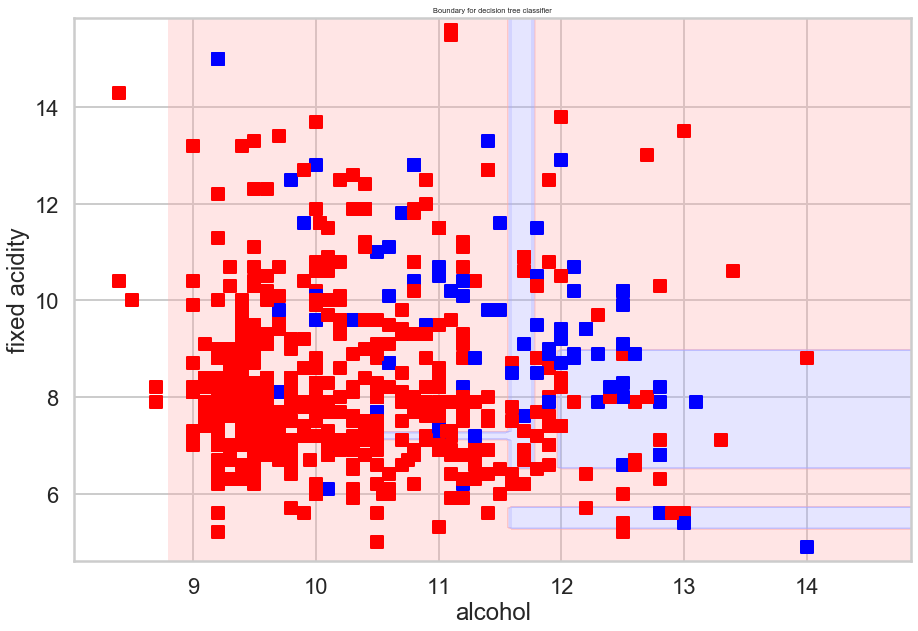

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 5} 0.32842344276436164 {'mean_fit_time': array([0.00119691, 0.00099788, 0.00039878]), 'std_fit_time': array([3.99327431e-04, 8.06404806e-07, 4.88402484e-04]), 'mean_score_time': array([0.0011972 , 0.00119672, 0.00099735]), 'std_score_time': array([3.98827255e-04, 3.99900034e-04, 9.53674316e-08]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.27777778, 0.33333333, 0.25      ]), 'split1_test_score': array([0.3       , 0.39215686, 0.42307692]), 'split2_test_score': array([0.38297872, 0.33333333, 0.34042553]), 'split3_te

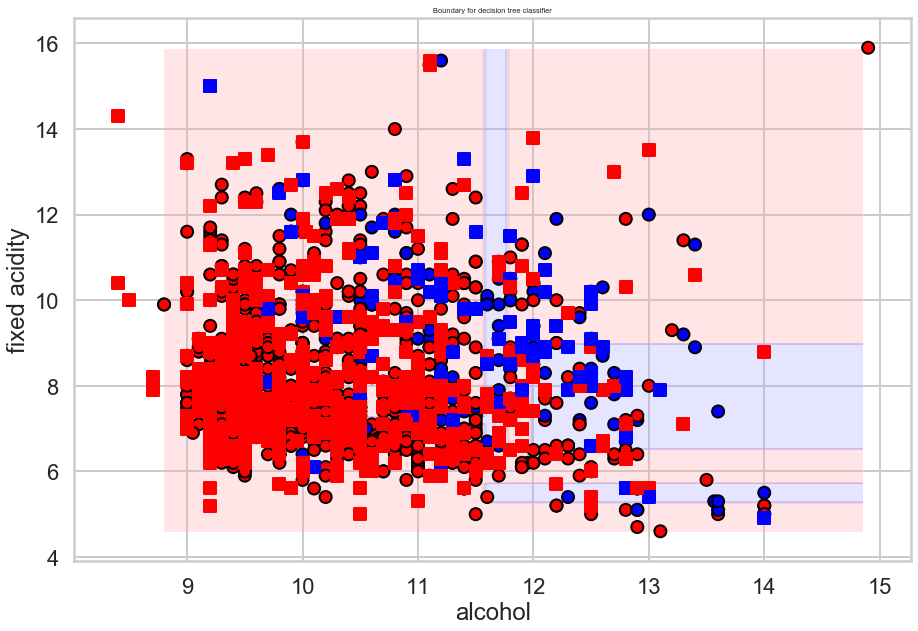

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.49183677155329314 {'mean_fit_time': array([0.00119543, 0.00079851, 0.00099754, 0.00139661, 0.00119691,
       0.00119772, 0.00099773, 0.00119686, 0.001197  , 0.00139613,
       0.00139589, 0.00159683, 0.00159636, 0.00199442, 0.00179577,
       0.00199375, 0.0017952 , 0.00099611, 0.00179572, 0.00139585,
       0.00199447, 0.00378904, 0.00239329, 0.00438871, 0.00199428,
       0.00498581, 0.0023942 , 0.00219302, 0.00199471, 0.0073792 ,
       0.00299149, 0.00259347, 0.00259314, 0.00339131, 0.00279279,
       0.00538435, 0.0023932 , 0.00239353, 0.00259356, 0.00299273,
       0.00359001, 0.00299182, 0.00299234, 0.00319123, 0.00219336,
       0.00259304, 0.00219412, 0.00219321, 0.00239305, 0.00199504,
       0.00259247, 0.00279222, 0.00219407, 0.00259166, 0.0025928 ,
       0.00199671, 0.00259285, 0.00199432, 0.00279212, 0.00239348,
       0.00259314, 0.00279193, 0.00279136, 0.00259252, 0.00279174,
       0.00259261, 0.0029912 , 0.00

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 18} 0.4171288139560043 {'mean_fit_time': array([0.00279264, 0.00478592, 0.00738015, 0.00857692, 0.01137047,
       0.0147603 , 0.01655507, 0.01914854, 0.02293892, 0.02094297,
       0.02333741, 0.02373643, 0.02553144, 0.02772536, 0.03011975,
       0.02592978, 0.03311076, 0.0287231 , 0.03111653]), 'std_fit_time': array([0.00039985, 0.00039812, 0.00135296, 0.00079765, 0.00185086,
       0.0041068 , 0.00184974, 0.00298535, 0.00484514, 0.00189173,
       0.00195395, 0.00097742, 0.00079806, 0.0007462 , 0.0003993 ,
       0.00471978, 0.00074619, 0.00596351, 0.00486109]), 'mean_score_time': array([0.00179534, 0.00159564, 0.0033916 , 0.00159602, 0.00279164,
       0.0037899 , 0.00219436, 0.00219564, 0.00319118, 0.00259328,
       0.00259352, 0.00339108, 0.00259509, 0.00279279, 0.00319109,
       0.00299282, 0.00339127, 0.00239363, 0.00239372]), 'std_score_time': array([0.00039866, 0.00048786, 0.00331365, 0.00048846, 0.00097597,
       0.00359046, 0.00039902, 0

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


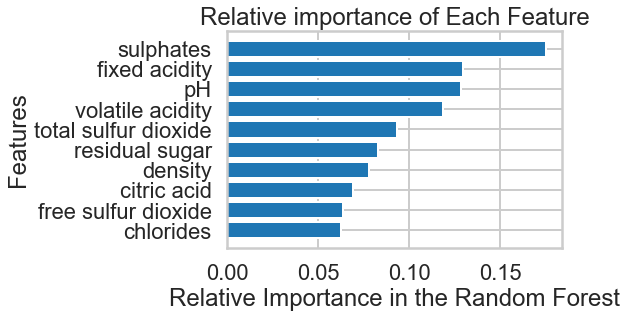

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 24} 0.453385686428142 {'mean_fit_time': array([0.02433577, 0.02752433, 0.0267283 , 0.02692747, 0.03071761,
       0.03091736, 0.03869677, 0.03510571, 0.03690138, 0.04308467,
       0.04268513, 0.04388189, 0.04587736, 0.0518611 , 0.05066428,
       0.05325737, 0.05604963, 0.06023865, 0.05964084, 0.06243329,
       0.06462359, 0.06642375, 0.06701994, 0.07180748, 0.07080922,
       0.07699375, 0.07579603, 0.07839017, 0.07858987, 0.0835763 ,
       0.08277822, 0.08916206, 0.08876166, 0.09275141, 0.09195542,
       0.09993272, 0.09634161, 0.10152826, 0.10033174, 0.10372238,
       0.10472021, 0.10711393, 0.10850959, 0.11010365, 0.11449256,
       0.11369572, 0.10272241, 0.11369567, 0.11090326, 0.09973416]), 'std_fit_time': array([2.05369697e-03, 4.82982059e-03, 1.59572382e-03, 1.50789149e-07,
       1.71542919e-03, 8.92070065e-04, 4.86126260e-03, 3.98397517e-04,
       6.30524834e-04, 4.90218460e-03, 1.59586669e-03, 6.30977461e-04,
       8.91856781e-04, 3.0

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 54} 0.4308533473687792 {'mean_fit_time': array([0.02194133, 0.03790379, 0.02493334, 0.02074404, 0.02613015,
       0.0227385 , 0.0283237 , 0.02513237, 0.02493281, 0.02612696,
       0.02672782, 0.02972021, 0.02493196, 0.02632933, 0.0267283 ,
       0.02832437, 0.03031855, 0.02812457, 0.02952085, 0.02872291,
       0.03051877, 0.03091702, 0.03231368, 0.03331118, 0.03370967,
       0.03370976, 0.03490672, 0.03570447, 0.03470464, 0.03550444,
       0.02932129, 0.03151541, 0.03291154, 0.03510556, 0.02991967,
       0.03351007, 0.0325129 , 0.03351045, 0.03390799, 0.03670154,
       0.03889475, 0.03670177, 0.03749957, 0.0408906 , 0.03949404,
       0.04089022, 0.04188781, 0.04248586, 0.04248805, 0.04667358,
       0.04487691, 0.04907074, 0.05166144, 0.04687443, 0.04886899,
       0.04807153, 0.04946756, 0.05026569, 0.05545259, 0.0546536 ,
       0.04009271, 0.04188762, 0.04368329, 0.04527831, 0.04587674,
       0.0468749 , 0.04906745, 0.05046492, 0.05285

In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

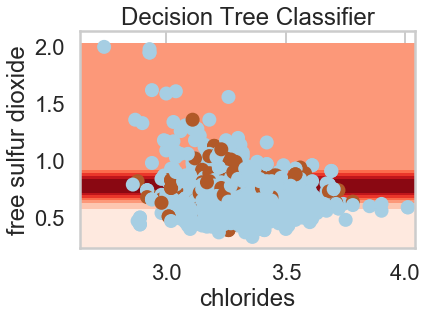

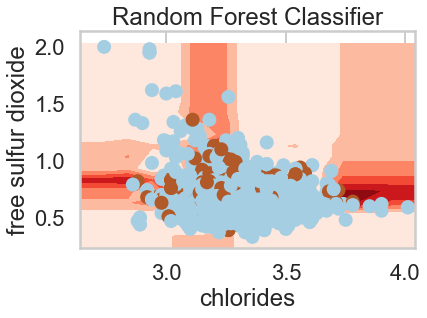

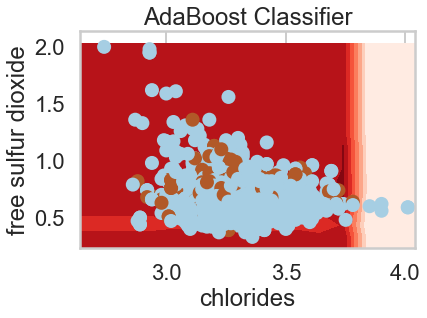

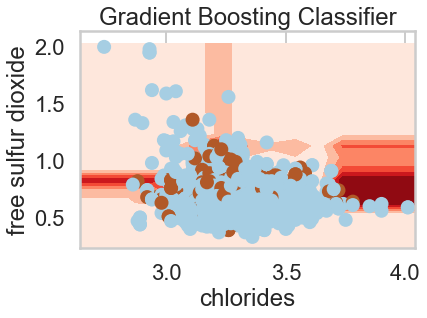

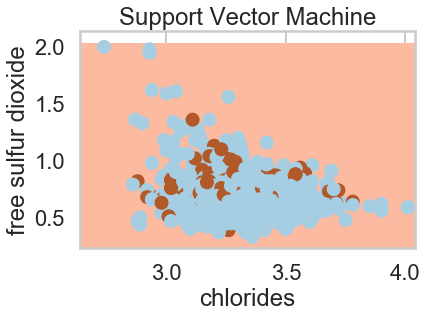

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32